In [1]:
import getdist
import pylab as mplot
import numpy as np
import astropy.io.fits as pf
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import os
from getdist import plots, MCSamples

import matplotlib
%matplotlib inline
# matplotlib.use('TkAgg')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_chain_info(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-3):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-3,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name

# polychord
def load_chain_info2(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-4):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-4,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name



In [3]:
def weighted_percentile(data, percents, weights=None):

    if weights is None:
        return np.percentile(data, percents)
    ind = np.argsort(data)
    d = data[ind]
    w = weights[ind]
    p = 1.*w.cumsum()/w.sum()*100
    y = np.interp(percents, p, d)
    return y

def print_constraints(s8, w):
    low = weighted_percentile(s8, 16, weights=w)
    high = weighted_percentile(s8, 84, weights=w)
    mean = np.average(s8, weights=w)
    print("$%.4f_{-%.4f}^{+%.4f}$" % (mean, mean-low, high-mean))

In [4]:
chain_dir = '/project/chihway/chihway/CosmicShearCosmosis/analysis/delve-campaign/'

# fiducial, sim
c_0, n_0, name_0 = load_chain_info(chain_dir+'sim_fiducial-cuts_20240901/fiducial-cuts.txt')
# fiducial, sim, contaminated
c_1, n_1, name_1 = load_chain_info(chain_dir+'sim_baryon-contam-fiducial-cuts_20240901/baryon-contam-fiducial-cuts.txt')

# fiducial, sim, no cut
c_2, n_2, name_2 = load_chain_info(chain_dir+'sim_nocuts_20240901/nocuts.txt')
# fiducial, sim, contaminated, no cut
c_3, n_3, name_3 = load_chain_info(chain_dir+'sim_baryon-contam-nocuts_20240901/baryon-contam-nocuts.txt')

# fiducial, sim, halofit
c_4, n_4, name_4 = load_chain_info(chain_dir+'sim_fiducial-cuts-halofit_20240901/fiducial-cuts-halofit.txt')
# fiducial, sim, halofit, contaminated
c_5, n_5, name_5 = load_chain_info(chain_dir+'sim_baryon-contam-fiducial-cuts-halofit_20240901/baryon-contam-fiducial-cuts-halofit.txt')

# fiducial, sim, TATT
c_6, n_6, name_6 = load_chain_info(chain_dir+'sim_TATT-fiducial-cuts_20240901/TATT-fiducial-cuts.txt')
# fiducial, sim, TATT, contaminated
c_7, n_7, name_7 = load_chain_info(chain_dir+'sim_baryon-contam-TATT-fiducial-cuts_20240901/baryon-contam-TATT-fiducial-cuts.txt')


[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

12600
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

12500
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

13100
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

12700
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

13300
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13

## Plot fiducial chain and contaminated chain

In [5]:
fid_0 = MCSamples(samples = np.c_[c_0[:,0],c_0[:,8], c_0[:,8]*np.sqrt(c_0[:,0]/0.3)],
                weights = np.exp(c_0[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "fiducial")

fid_1 = MCSamples(samples = np.c_[c_1[:,0],c_1[:,8], c_1[:,8]*np.sqrt(c_1[:,0]/0.3)],
                weights = np.exp(c_1[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "contaminated")

fid_2 = MCSamples(samples = np.c_[c_2[:,0],c_2[:,8], c_2[:,8]*np.sqrt(c_2[:,0]/0.3)],
                weights = np.exp(c_2[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "fiducial no cuts")

fid_3 = MCSamples(samples = np.c_[c_3[:,0],c_3[:,8], c_3[:,8]*np.sqrt(c_3[:,0]/0.3)],
                weights = np.exp(c_3[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "contaminated no cuts")

fid_4 = MCSamples(samples = np.c_[c_4[:,0],c_4[:,8], c_4[:,8]*np.sqrt(c_4[:,0]/0.3)],
                weights = np.exp(c_4[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "fiducial halofit")

fid_5 = MCSamples(samples = np.c_[c_5[:,0],c_5[:,8], c_5[:,8]*np.sqrt(c_5[:,0]/0.3)],
                weights = np.exp(c_5[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "contaminated halofit")

fid_6 = MCSamples(samples = np.c_[c_6[:,0],c_6[:,11], c_6[:,11]*np.sqrt(c_6[:,0]/0.3)],
                weights = np.exp(c_6[:,14]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "fiducial TATT")

fid_7 = MCSamples(samples = np.c_[c_7[:,0],c_7[:,11], c_7[:,11]*np.sqrt(c_7[:,0]/0.3)],
                weights = np.exp(c_7[:,14]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "contaminated halofit")


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


## Fiducial

fiducial S_8 = 0.829\pm 0.022
contaminated S_8 = 0.823\pm 0.022
no cut S_8 = 0.835\pm 0.011
contaminated no cut S_8 = 0.814\pm 0.011


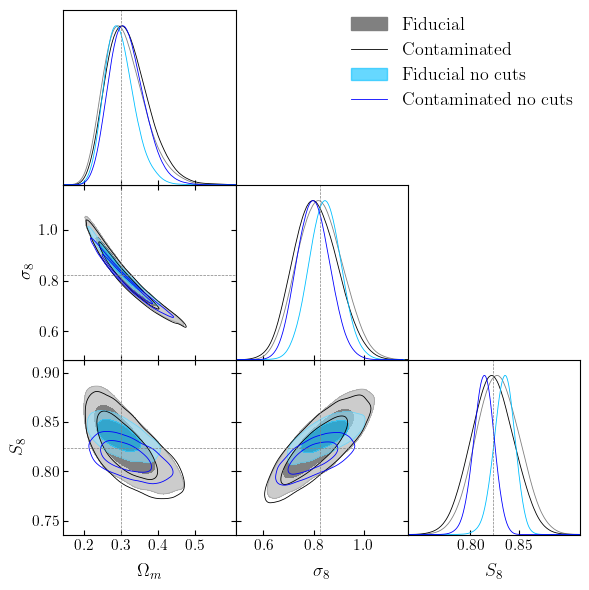

In [6]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_1, fid_2, fid_3],
                ['omegam','sigma8', 'S8'], 
                filled=[True, False, True, False],
                alpha=[1, 1, 1, 1],
                lw = [0,3,0,3],
                legend_labels=["Fiducial", "Contaminated", "Fiducial no cuts", "Contaminated no cuts"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'k', 'deepskyblue', 'blue'],
                markers={'omegam':0.3, 'sigma8': 0.82355, 'S8':0.82355})


print('fiducial', fid_0.getInlineLatex('S8',limit=1))
print('contaminated', fid_1.getInlineLatex('S8',limit=1))
print('no cut', fid_2.getInlineLatex('S8',limit=1))
print('contaminated no cut', fid_3.getInlineLatex('S8',limit=1))

mplot.savefig('scalecut_20240901.pdf', bbox_inches='tight')

# add truth?

## Halofit

fiducial S_8 = 0.816\pm 0.020
contaminated S_8 = 0.810\pm 0.020


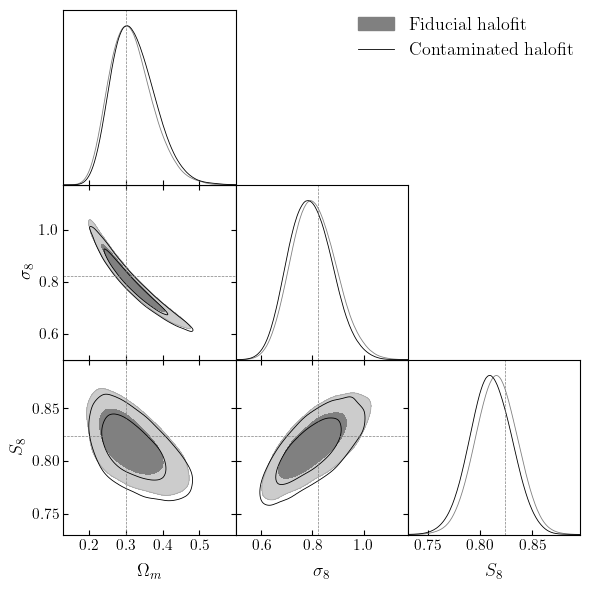

In [8]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_4, fid_5],
                ['omegam','sigma8', 'S8'], 
                filled=[True, False, True, False],
                alpha=[1, 1, 1, 1],
                lw = [0,3,0,3],
                legend_labels=["Fiducial halofit", "Contaminated halofit"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'k', 'deepskyblue', 'blue'],
                markers={'omegam':0.3, 'sigma8': 0.82355, 'S8':0.82355})


print('fiducial', fid_4.getInlineLatex('S8',limit=1))
print('contaminated', fid_5.getInlineLatex('S8',limit=1))

mplot.savefig('scalecut_halofit_20240901.pdf', bbox_inches='tight')


## TATT

fiducial S_8 = 0.829\pm 0.024
contaminated S_8 = 0.824\pm 0.024


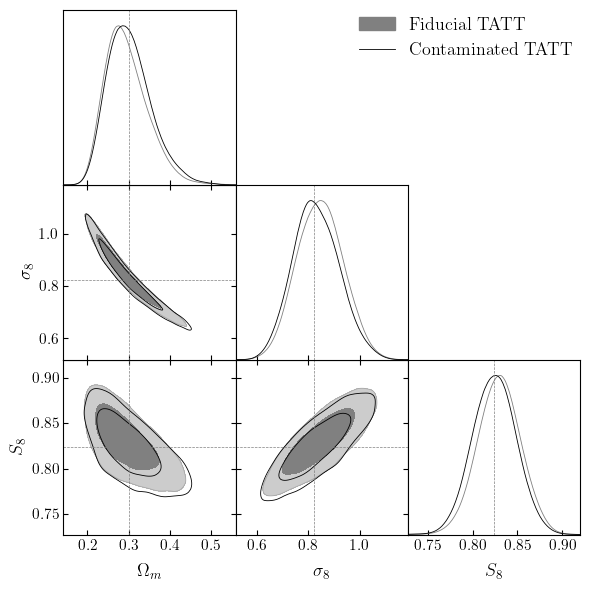

In [9]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_6, fid_7],
                ['omegam','sigma8', 'S8'], 
                filled=[True, False, True, False],
                alpha=[1, 1, 1, 1],
                lw = [0,3,0,3],
                legend_labels=["Fiducial TATT", "Contaminated TATT"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'k', 'deepskyblue', 'blue'],
                markers={'omegam':0.3, 'sigma8': 0.82355, 'S8':0.82355})


print('fiducial', fid_6.getInlineLatex('S8',limit=1))
print('contaminated', fid_7.getInlineLatex('S8',limit=1))

mplot.savefig('scalecut_TATT_20240901.pdf', bbox_inches='tight')
